In [19]:
from bodies import *
import orbit as orb
import observer as obs

import importlib
importlib.reload(orb)
importlib.reload(obs)

import matplotlib.pyplot as plt

Create system

In [2]:
star = Star(mass=0.9, v0=0., name="Allen's star")
planet_b = Planet(period=53.3, ecc=0.14, K=2.3, tp=50, w=3.14)
system = System(star, [planet_b])

Create time-series and observe system

In [3]:
# Create time-series
times, RVs_obs, errors = obs.observe_system(system=system, run_length=180, weather=0.5, noise=0.)

# Ideal orbit
times_ideal = np.arange(times[0], times[-1]+0.01, 0.01)
RVs_ideal = obs.get_system_RVs(system, times_ideal)

Observed vs ideal orbit

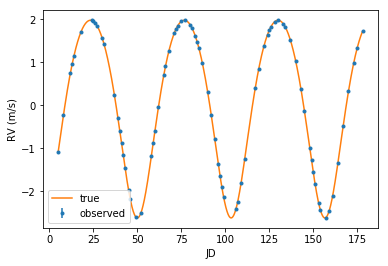

In [4]:
plt.figure()
plt.errorbar(times, RVs_obs, yerr=errors, marker='.', linestyle='', label='observed')
plt.plot(times_ideal, RVs_ideal, marker='', linestyle='-', label='true')
plt.legend()
plt.title('')
plt.xlabel('JD')
plt.ylabel('RV (m/s)')
plt.show()

Fit the observed data

Warning, error bars will be ignored in fitting, since at least one data point as a reported error of 0.
[[Fit Statistics]]
    # function evals   = 25
    # data points      = 80
    # variables        = 6
    chi-square         = 2.756
    reduced chi-square = 0.037
    Akaike info crit   = -257.472
    Bayesian info crit = -243.180
[[Variables]]
    P:    53.0995566 +/- 0.125182 (0.24%) (init= 52)
    e:    0.14916334 +/- 0.015836 (10.62%) (init= 0.2)
    tp:   47.5143312 +/- 1.462943 (3.08%) (init= 5)
    w:    2.95228555 +/- 0.185933 (6.30%) (init= 3.141593)
    K:    2.39208534 +/- 0.045506 (1.90%) (init= 1)
    v0:  -0.00151168 +/- 0.021844 (1445.02%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(tp, w)                     =  0.996 
    C(w, K)                      = -0.698 
    C(tp, K)                     = -0.696 
    C(e, K)                      =  0.388 
    C(e, w)                      = -0.322 
    C(e, tp)                     = -0.318 


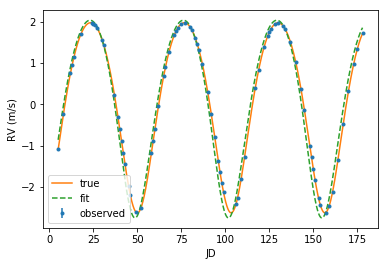

In [20]:
fit = orb.fit_Keplerian(times, RVs_obs, P_guess=52, err=errors, report=True)

P_fit = fit['P'].value
e_fit = fit['e'].value
tp_fit = fit['tp'].value
w_fit = fit['w'].value
K_fit = fit['K'].value
v0_fit = fit['v0'].value

planet_b_fit = Planet(period=P_fit, ecc=e_fit, K=K_fit, tp=tp_fit, w=w_fit)
star_fit = Star(mass=star.mass, v0=v0_fit)
system_fit = System(star_fit, [planet_b_fit])

RVs_fit = obs.get_system_RVs(system_fit, times_ideal)

plt.figure()
plt.errorbar(times, RVs_obs, yerr=errors, marker='.', linestyle='', label='observed')
plt.plot(times_ideal, RVs_ideal, marker='', linestyle='-', label='true')
plt.plot(times_ideal, RVs_fit, marker='', linestyle='--', label='fit')
plt.legend()
plt.title('')
plt.xlabel('JD')
plt.ylabel('RV (m/s)')
plt.show()

In [ ]:
fit['K'].value

In [ ]:
type(planet_b_fit.K)

In [ ]:
type(4.2) is float

In [ ]:
type(4.2)